In [1]:
import requests
import json
import prettytable
import os
import pandas as pd
import dtale
import plotly.express as px 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
# BLS API v1 url
base_url = 'https://api.bls.gov/publicAPI/v1/timeseries/data/'

In [3]:
# BLS series id for the civilian labor force participation rate
series = {'id': 'CEU0800000003',
          'name': 'National Employment, Hours, and Earnings'}

In [4]:
data_url = '{}{}'.format(base_url, series['id'])
print(data_url)

https://api.bls.gov/publicAPI/v1/timeseries/data/CEU0800000003


In [5]:
r = requests.get(data_url).json()
print('Status: ' + r['status'])

Status: REQUEST_SUCCEEDED


In [6]:
print(r.keys())

dict_keys(['status', 'responseTime', 'message', 'Results'])


In [7]:
r = r['Results']['series'][0]['data']
print(r[0])

{'year': '2021', 'period': 'M11', 'periodName': 'November', 'latest': 'true', 'value': '30.86', 'footnotes': [{'code': 'P', 'text': 'preliminary'}]}


In [12]:
import pandas as pd

dates = ['{} {}'.format(i['period'], i['year']) for i in r]
index = pd.to_datetime(dates)
data = {series['id']: [float(i['value']) for i in r],
        'footnotes': [i['footnotes'][0] for i in r]}

df = pd.DataFrame(index=index, data=data).iloc[::-1]

df.head()

,CEU0800000003,footnotes
2019-01-01 00:00:01,27.51,{}
2019-01-01 00:00:02,27.58,{}
2019-01-01 00:00:03,27.57,{}
2019-01-01 00:00:04,27.63,{}
2019-01-01 00:00:05,27.53,{}


<AxesSubplot:title={'center':'National Employment, Hours, and Earnings'}>

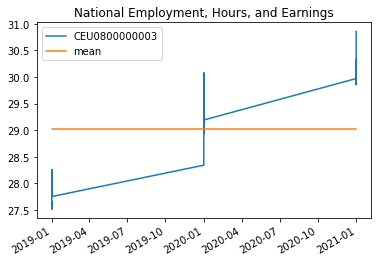

In [9]:
%matplotlib inline

df['mean'] = df[series['id']].mean()
df[[series['id'], 'mean']].plot(title=series['name'])

In [13]:
bls_key = os.environ.get('bls_key')

In [22]:
#api key has been saved in the environment


# The url for BLS API v2
url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

# API key in config.py which contains: bls_key = 'key'
key = '?registrationkey={}'.format(bls_key)

# Series stored as a dictionary
series_dict = {
    'CEU0800000003': 'national employment',
    'SMU19197802023800001': 'state employment'}

# Start year and end year
dates = ('2018', '2021')

In [23]:
import json

# Specify json as content type to return
headers = {'Content-type': 'application/json'}

# Submit the list of series as data
data = json.dumps({
    "seriesid": list(series_dict.keys()),
    "startyear": dates[0],
    "endyear": dates[1]})

# Post request for the data
p = requests.post(
    '{}{}'.format(url, key),
    headers=headers,
    data=data).json()['Results']['series']

In [24]:
# Date index from first series
date_list = [f"{i['year']}-{i['period'][1:]}-01" for i in p[0]['data']]

# Empty dataframe to fill with values
df = pd.DataFrame()

# Build a pandas series from the API results, p
for s in p:
    df[series_dict[s['seriesID']]] = pd.Series(
        index = pd.to_datetime(date_list),
        data = [i['value'] for i in s['data']]
        ).astype(float).iloc[::-1]

# Show last 5 results
df.tail()

ValueError: Length of passed values is 46, index implies 47.

<AxesSubplot:title={'center':'Industry Employment'}>

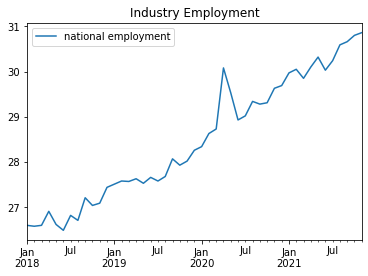

In [25]:
# Simple line plot of the data
df.plot(title='Industry Employment')